### ***Señales Electricas:*** *Trabajo Practico 7*

In [5]:
import matplotlib.pyplot as plt
import numpy as np 

from scipy.ndimage import shift 
from scipy.fft import ifft, fft
from scipy.signal import freqs, iirfilter, square

from typing import Union, List, Tuple
from IPython.display import Audio

### *Funciones Auxiliares*

In [6]:
def obtener_pulso_rectangular(periodo: Union[float, int], vector_temp: np.ndarray, ciclo_de_trabajo: float, es_centrado: bool = False) -> np.ndarray:
    
    """Obtener un pulso rectangular
    Parametros
    ----------
    periodo: Union[float, int] 
        Periodo del pulso rectangular
    vector_temp: np.ndarray
        Eje temporal del pulso rectangular
    Ciclo_de_trabajo: float
        Ciclo de trabajo esperado
    es_centrado: Opcional[bool] = False
        Indica si el pulso está centrado o no en el origen

    Retorna
    -------
    np.ndarray
        Pulso rectangular deseado
    """

    voltaje_inferior = 0

    senial = square((2*np.pi*1/periodo)*vector_temp, duty=ciclo_de_trabajo)
    senial[senial < 0] = voltaje_inferior

    if es_centrado:
        senial = shift(senial, senial.size*(1-ciclo_de_trabajo)/2, cval = voltaje_inferior)

    return senial

In [14]:
def obtener_funcion_deseada(pares_ord: List[Tuple[int,int]], cant_ptos_ciclos: int) -> Tuple[np.ndarray, np.ndarray, int]:

    x_max = np.max([x for x, y in pares_ord])
    x_min = np.min([x for x, y in pares_ord])

    vector_y = [y for x, y in pares_ord]

    seniales_en_x = np.linspace(start=x_min, stop=x_max, num=cant_ptos_ciclos)

    seniales_en_y = []

    for index in range(len(pares_ord)):
        if index == 0:
            seniales_en_y.append(pares_ord[index][1])
        elif index == len(pares_ord) - 1:
            continue

        pendiente = (pares_ord[index + 1][1] - pares_ord[index][1]) / (pares_ord[index + 1][0] - pares_ord[index][0])

        for muestra_temporal in seniales_en_x:
            if pares_ord[index][0] <= muestra_temporal and muestra_temporal < pares_ord[index + 1][0]:
                seniales_en_y.append(seniales_en_y[-1] + pendiente * (x_max - x_min) / muestra_temporal.size)

    return np.array(seniales_en_y)

### Ejercicio 1

In [8]:
# Definición de variables

periodo = 2 #segundos
frecuencia_muestreo = 1e3 #Hz
total_samples = int(periodo * frecuencia_muestreo)

In [9]:
# Generación de vector con muestras temporales

vector_muestras_temp = np.array([*range(total_samples)]) * 1/frecuencia_muestreo

In [11]:
# generación de pulso rectangular 

pulso_rectangular = obtener_pulso_rectangular(
    periodo          = periodo,
    vector_temp      = vector_muestras_temp,
    ciclo_de_trabajo = 0.5,
    es_centrado      = False
)

In [15]:
# Generación de aleta de tiburón

pares_ordenados = [(0,0), (5,1), (5.0001, 0)]

aleta_tiburon = obtener_funcion_deseada(
    pares_ord        = pares_ordenados,
    cant_ptos_ciclos = vector_muestras_temp.size
)

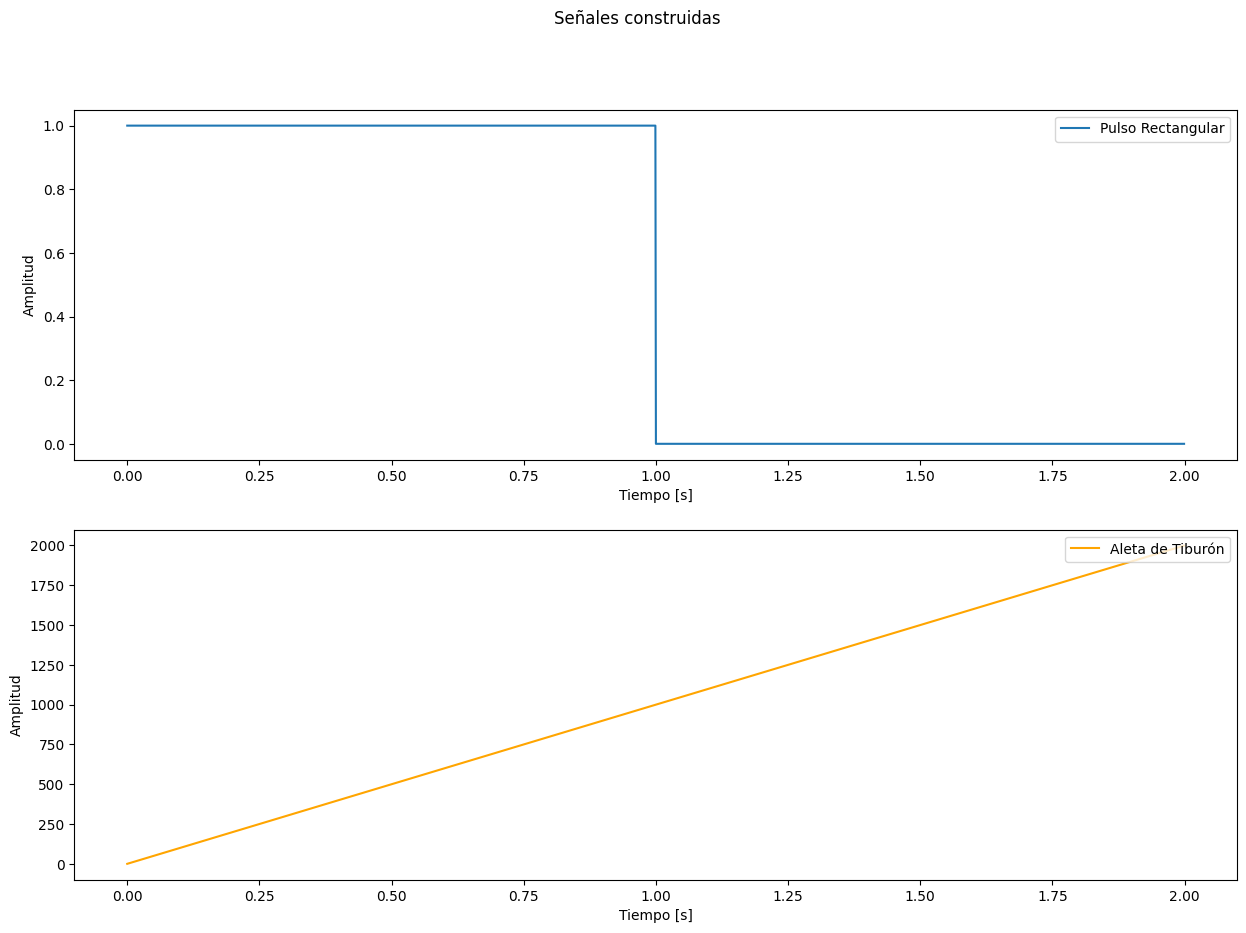

In [19]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(15, 10)

fig.suptitle("Señales construidas")

ax1.plot(vector_muestras_temp, pulso_rectangular, label="Pulso Rectangular")
ax1.legend(loc="upper right")
ax1.set_ylabel("Amplitud")
ax1.set_xlabel("Tiempo [s]")

ax2.plot(vector_muestras_temp, aleta_tiburon,"orange" ,label="Aleta de Tiburón")
ax2.legend(loc="upper right")
ax2.set_ylabel("Amplitud")
ax2.set_xlabel("Tiempo [s]")

plt.show()